# STEP #0: IMPORT LIBRARY

In [364]:
import warnings; 
warnings.simplefilter('ignore')

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string, re
from nltk.stem.wordnet import WordNetLemmatizer

#STEP #1: IMPORT DATASET

In [366]:
dataset = pd.read_excel('Last_Sample.xlsx')

In [367]:
dataset.head(1)

,Number,User Name,Sex,Relationship status,Occupation,Age,User Description / About,About in Bangla,Location(Division),Time Acount Was Created,No. Of Friends,Followers,Date of Post,Post,Text,Label
0,1,Manjari Chy Oni,Female,Married,Employee,21-25,"To whom personal rights arise, Can't tolerate ...","""আপনি লোকেদের যা বলবেন তা সাবধানে রাখুন। আজ বন...",Chattogram,4/09/19,225.0,368,2022-06-08 00:00:00,I want to go as far as I can't come back.,"Dear God,🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দ...",1


# STEP #2: VISUALIZE DATASET

In [368]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778 entries, 0 to 1777
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Number                    1778 non-null   int64  
 1   User Name                 1717 non-null   object 
 2   Sex                       1775 non-null   object 
 3   Relationship status       1778 non-null   object 
 4   Occupation                1778 non-null   object 
 5   Age                       1778 non-null   object 
 6   User Description / About  369 non-null    object 
 7   About in Bangla           419 non-null    object 
 8   Location(Division)        1778 non-null   object 
 9   Time Acount Was Created   204 non-null    object 
 10  No. Of Friends            86 non-null     float64
 11  Followers                 309 non-null    object 
 12  Date of Post              1627 non-null   object 
 13  Post                      648 non-null    object 
 14  Text    

In [369]:
dataset.shape

(1778, 16)

In [370]:
dataset.dtypes

Number                        int64
User Name                    object
Sex                          object
Relationship status          object
Occupation                   object
Age                          object
User Description / About     object
About in Bangla              object
Location(Division)           object
Time Acount Was Created      object
No. Of Friends              float64
Followers                    object
Date of Post                 object
Post                         object
Text                         object
Label                         int64
dtype: object

In [371]:
dataset.head(1)

,Number,User Name,Sex,Relationship status,Occupation,Age,User Description / About,About in Bangla,Location(Division),Time Acount Was Created,No. Of Friends,Followers,Date of Post,Post,Text,Label
0,1,Manjari Chy Oni,Female,Married,Employee,21-25,"To whom personal rights arise, Can't tolerate ...","""আপনি লোকেদের যা বলবেন তা সাবধানে রাখুন। আজ বন...",Chattogram,4/09/19,225.0,368,2022-06-08 00:00:00,I want to go as far as I can't come back.,"Dear God,🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দ...",1


In [372]:
dataset.describe()

,Number,No. Of Friends,Label
count,1778.000000,86.000000,1778.000000
mean,728.618110,5303.418605,0.329584
std,430.023521,3856.805821,0.470194
min,1.000000,225.000000,0.000000
25%,364.250000,3893.000000,0.000000
50%,741.500000,3893.000000,0.000000
75%,1125.000000,3893.000000,1.000000
max,1500.000000,12000.000000,1.000000


In [373]:
# Let's see which message is the most popular ham/spam message
dataset.groupby('Label').describe()

Number                                                              \
        count        mean         std  min     25%    50%     75%     max   
Label                                                                       
0      1192.0  825.557047  401.520975  3.0  445.75  839.5  1163.0  1499.0   
1       586.0  531.431741  418.799199  1.0  141.25  431.0   796.0  1500.0   

      No. Of Friends                                                           \
               count         mean          std    min     25%     50%     75%   
Label                                                                           
0                9.0  2977.000000  3584.333027  967.0  1208.0  1208.0  3893.0   
1               77.0  5575.337662  3816.839267  225.0  3893.0  3893.0  3893.0   

                
           max  
Label           
0      12000.0  
1      12000.0

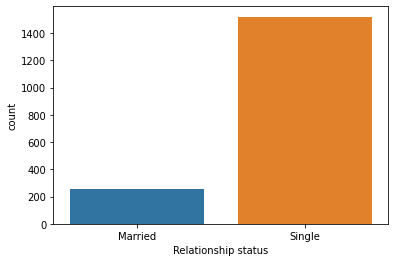

In [374]:
sns.countplot(dataset['Relationship status'], label = "Count")

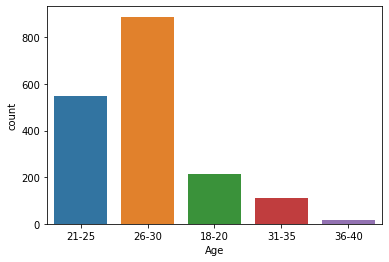

In [375]:
sns.countplot(dataset['Age'], label = "Count")

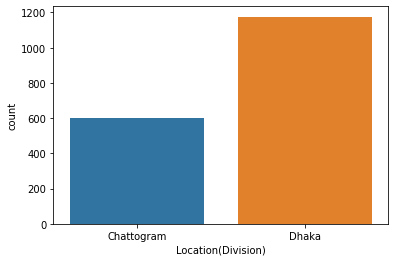

In [376]:
sns.countplot(dataset['Location(Division)'], label = "Count")

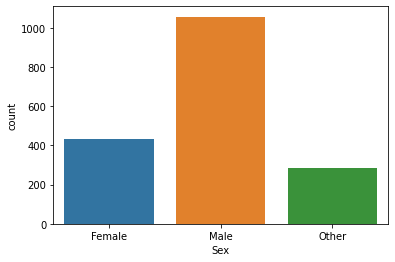

In [377]:
sns.countplot(dataset['Sex'], label = "Count")

# STEP #3: DATA CLEANING

In [378]:
dataset.drop(["Number", "User Name", "Sex","Relationship status", "Occupation", "Age","User Description / About", "About in Bangla", "Location(Division)", "Time Acount Was Created", "No. Of Friends", "Followers","Date of Post","Post"],inplace = True, axis = 1)

In [379]:
dataset

,Text,Label
0,"Dear God,🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দ...",1
1,পরিবর্তন তখনই আসে.....যখন আপনার কাছে অনেক টাকা...,1
2,বেইমান কোনদিন বন্ধু হতে পারেনা ⚠️\nআর বন্ধু কখ...,0
3,"যা কিছু পেয়েছি সেইগুলো আমার অর্জন, যা হারিয়ে...",0
4,বোঝেনা কেউ তা বোঝেনা ???,1
...,...,...
1773,কিছু মানুষের হাত সব সময় আশীর্বাদের জন্য ওঠে♥️ ...,0
1774,শুভ জন্মদিন দাদা🎂🍫☺ তোর আগামী দিনগুলো যেন খুব ...,0
1775,মাঝে মাঝে মনে হয় কুঁকড়ে উঠে আমার ঘরের গভীর ক...,1
1776,আমি মোট ১৯টা দেশে ঘুরেছি এবং নিজের ইনকাম করা...,0


In [380]:
#df = pd.read_excel('check_test.xlsx')

In [381]:
data = dataset[['Text', 'Label']]
data.head()

,Text,Label
0,"Dear God,🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দ...",1
1,পরিবর্তন তখনই আসে.....যখন আপনার কাছে অনেক টাকা...,1
2,বেইমান কোনদিন বন্ধু হতে পারেনা ⚠️\nআর বন্ধু কখ...,0
3,"যা কিছু পেয়েছি সেইগুলো আমার অর্জন, যা হারিয়ে...",0
4,বোঝেনা কেউ তা বোঝেনা ???,1


In [382]:
# Let's get the length of the messages
data['length'] = data['Text'].apply(len)

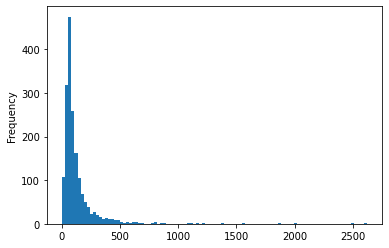

In [383]:
data['length'].plot(bins=100, kind='hist') 

In [384]:
data.length.describe()

count    1778.000000
mean      131.593363
std       182.928197
min         5.000000
25%        58.250000
50%        83.000000
75%       137.000000
max      2619.000000
Name: length, dtype: float64

In [385]:
# Let's see the longest message 43952
data[data['length'] == 2619]['Text'].iloc[0]

'কেউ অহেতুক ঘৃণা করুক বিষয়টা আমার ভাল লাগে না। তাই মাঝে মাঝেই একটা কাজ করি , আমাকে যারা গালি দেন তাদের জিগ্যেস করি কেন দিলেন, বেশির ভাগ ক্ষেত্রেই মানুষটা ইনবক্সে সরি বলেন অথবা এতটাই লজ্জিত হন যে ব্লক করে দেন। এই কাজটা আমি ২০১৩ থেকে করি। ২০১৩ তে একটা ছেলে টানা তিন মাসে অলমোস্ট রোজ এসে গালি দিয়ে যেত, একবার সে বলেই বসল যেখানে পাবে খুন করে ফেলবে। আমি সেই ছেলের বাসা খুঁজে বের করলাম, তারপর ওর বাড়িতে গিয়ে ওর বাড়ির সবার সাথে পরিচিত হলাম। খালাম্মা খুব যত্ন করে পিঠা খাইয়েছিলেন। আমি ওর সম্পর্কে ওর পরিবারের কাউকে কিছুই বলিনি। ফেরার সময় ও খুব করে মাপ চেয়েছিল। সত্যি বলতে ওকে লজ্জা দেবার জন্য যাইনি, গিয়েছিলাম এটা বোঝাতে আমি খারাপ মানুষ না। আমাকে মারতে চাওয়ার আগে তোমার উচিৎ আমার সাথে অন্তত একদিন আড্ডা দেয়া। ছেলেটা আমার লিস্টে আছে, খুব ভাল যোগাযোগ আছে ওর সাথে। আচ্ছা এই যে আমরা একজন মানুষ কে না জেনে,  না চিনে,  তার একটা লেখার সাথে আমার মনের মিল না হাওয়ায় তার প্রতি তীব্র ঘৃণা পোষণ করে ফেলছি, সেটা কি আমরা খেয়াল করেছি? অথচ ৭০ বছর পরে আপনি আর সে কেউ বেঁচে থাকবে না। আপনারা সারা জীবন এক জন আর এক

In [386]:
# Let's divide the messages into spam and ham

In [387]:
not_depressed = data[data['Label']==0]

In [388]:
depressed = data[data['Label']==1]

In [389]:
depressed

,Text,Label,length
0,"Dear God,🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দ...",1,79
1,পরিবর্তন তখনই আসে.....যখন আপনার কাছে অনেক টাকা...,1,145
4,বোঝেনা কেউ তা বোঝেনা ???,1,24
5,"কি ব্যথায় পুড়ছি প্রতিক্ষণ ,",1,29
6,জানে না কেউ তা জানে না ???,1,26
...,...,...,...
1769,এমন কিছু সময় আছে যখন মাকে অনেক বেশি মিস করি😒😒😭...,1,428
1770,অল্প সময়ের জন্যে এসে দেখা করে আবার চলে আসার স...,1,155
1771,মনে একটা ভয় বেঁকে বসেছে এই অনিশ্চিত জীবন যাপনে...,1,641
1775,মাঝে মাঝে মনে হয় কুঁকড়ে উঠে আমার ঘরের গভীর ক...,1,208


In [390]:
not_depressed

,Text,Label,length
2,বেইমান কোনদিন বন্ধু হতে পারেনা ⚠️\nআর বন্ধু কখ...,0,70
3,"যা কিছু পেয়েছি সেইগুলো আমার অর্জন, যা হারিয়ে...",0,68
10,সব আবেগ আর ভালোবাসা পেলে যান্ত্রিক শহরে আসতে ব...,0,142
12,অনেক ঘুরতে ভালোবাসি😊,0,20
15,আরও 16 মিলিয়ন নারী হওয়া সত্ত্বেও\nঅবিবাহিত হ...,0,135
...,...,...,...
1768,প্রথমবার ঘটকালিতে সফল।😁😁 ভাবছি এই লাইনে নেমে ...,0,236
1772,ফেসবুকের নতুন এক আশ্চর্য বাগ বা গ্লিচ এর কারণে...,0,311
1773,কিছু মানুষের হাত সব সময় আশীর্বাদের জন্য ওঠে♥️ ...,0,83
1774,শুভ জন্মদিন দাদা🎂🍫☺ তোর আগামী দিনগুলো যেন খুব ...,0,81


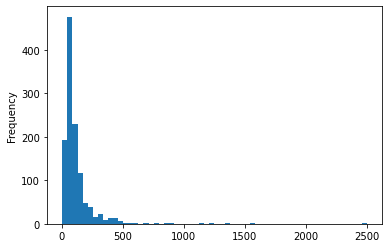

In [391]:
not_depressed['length'].plot(bins=60, kind='hist') 

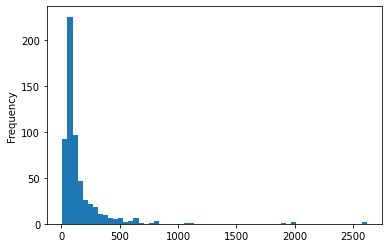

In [392]:
depressed['length'].plot(bins=60, kind='hist') 

In [393]:
print( 'not_depressed percentage =', (len(not_depressed) / len(data) )*100,"%")

not_depressed percentage = 67.04161979752531 %


In [394]:
print( 'depressed =', (len(depressed) / len(data) )*100,"%")

depressed = 32.95838020247469 %


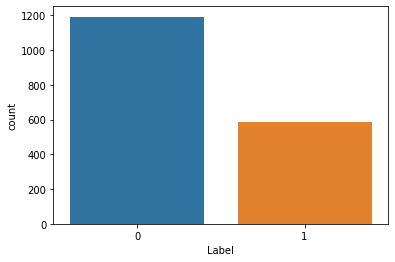

In [395]:
sns.countplot(data['Label'], label = "Count") 

##  NLP Technique

In [437]:
!pip3 install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 1.4 MB 12.5 MB/s 
     |████████████████████████████████| 42 kB 922 kB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 65 kB 3.1 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=2553e0d92da139ac391be20c2726289347f919da5b76c5a7f86733153fad298a
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [438]:
#Translate the other languages to english
import googletrans
from googletrans import *
translator = googletrans.Translator()

data['Text'] = data['Text'].astype(str) #changing datatype to string
data['translated_Text'] = data['Text'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',))
data

,Text,Label,length,Removed Puncutation,Removed Garbage,Tokenizer,Stemmed,Lemmatizer,Removed Stopped word,pos_tagger,sentence,translated_Text
0,"Dear God,🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দ...",1,79,Dear God🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দূ...,ঠিক ততোটা দূরে যেতে চাই যতোটা দূরে গেলে আর ফির...,"[ঠিক, ততোটা, দূরে, যেতে, চাই, যতোটা, দূরে, গেল...","[ঠিক, ততো, দূরে, যেত, চাই, যতো, দূরে, গাল, আর,...",ঠিক ততোটা দূরে যেতে চাই যতোটা দূরে গেলে আর ফির...,"[ততোটা, দূরে, চাই, যতোটা, দূরে, আসা, যায়না]","[(ঠিক, AMN), (ততোটা, JQ), (দূরে, NST), (যেতে, ...",ঠিক ততো দূরে যেত চাই যতো দূরে গাল আর ফিরে আসা ...,"Dear God, I want to go as far as I can't come ..."
1,পরিবর্তন তখনই আসে.....যখন আপনার কাছে অনেক টাকা...,1,145,পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...,পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...,"[পরিবর্তন, তখনই, আসেযখন, আপনার, কাছে, অনেক, টা...","[পরিবর্তন, তখন, আসেযখন, আপন, কাছ, অনেক, টাকা, ...",পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...,"[পরিবর্তন, তখনই, আসেযখন, টাকা, একা, বোধ, করেনঅ...","[(পরিবর্তন, NC), (তখনই, ALC), (আসেযখন, VM), (আ...",পরিবর্তন তখন আসেযখন আপন কাছ অনেক টাকা থাক না ব...,Change comes only.....when you don't have much...
2,বেইমান কোনদিন বন্ধু হতে পারেনা ⚠️\nআর বন্ধু কখ...,0,70,বেইমান কোনদিন বন্ধু হতে পারেনা ⚠️\nআর বন্ধু কখ...,বেইমান কোনদিন বন্ধু হতে পারেনা আর বন্ধু কখনো ব...,"[বেইমান, কোনদিন, বন্ধু, হতে, পারেনা, আর, বন্ধু...","[বেইমান, কোনদিন, বন্ধু, হত, পারেনা, আর, বন্ধু,...",বেইমান কোনদিন বন্ধু হতে পারেনা আর বন্ধু কখনো ব...,"[বেইমান, কোনদিন, বন্ধু, পারেনা, বন্ধু, কখনো, ব...","[(বেইমান, JJ), (কোনদিন, ALC), (বন্ধু, NC), (হত...",বেইমান কোনদিন বন্ধু হত পারেনা আর বন্ধু কখনো বে...,Dishonesty can never be a friend ⚠️\nAnd frien...
3,"যা কিছু পেয়েছি সেইগুলো আমার অর্জন, যা হারিয়ে...",0,68,যা কিছু পেয়েছি সেইগুলো আমার অর্জন যা হারিয়েছ...,যা কিছু পেয়েছি সেইগুলো আমার অর্জন যা হারিয়েছ...,"[যা, কিছু, পেয়েছি, সেইগুলো, আমার, অর্জন, যা, ...","[যা, কিছু, পেয়ে, সেই, আম, অর্জন, যা, হারিয়েছ...",যা কিছু পেয়েছি সেইগুলো আমার অর্জন যা হারিয়েছ...,"[পেয়েছি, সেইগুলো, অর্জন, হারিয়েছি, অভিজ্ঞতা]","[(যা, PRL), (কিছু, JQ), (পেয়েছি, VM), (সেইগুল...",যা কিছু পেয়ে সেই আম অর্জন যা হারিয়েছি সেটা আ...,"What I have gained is my achievement, what I h..."
4,বোঝেনা কেউ তা বোঝেনা ???,1,24,বোঝেনা কেউ তা বোঝেনা,বোঝেনা কেউ তা বোঝেনা,"[বোঝেনা, কেউ, তা, বোঝেনা]","[বোঝেনা, কেউ, তা, বোঝেনা]",বোঝেনা কেউ তা বোঝেনা,"[বোঝেনা, বোঝেনা]","[(বোঝেনা, NC), (কেউ, PPR), (তা, PPR), (বোঝেনা,...",বোঝেনা কেউ তা বোঝেনা,No one understands that???
...,...,...,...,...,...,...,...,...,...,...,...,...
1773,কিছু মানুষের হাত সব সময় আশীর্বাদের জন্য ওঠে♥️ ...,0,83,কিছু মানুষের হাত সব সময় আশীর্বাদের জন্য ওঠে♥️ ...,কিছু মানুষের হাত সব সময় আশীর্বাদের জন্য ওঠে,"[কিছু, মানুষের, হাত, সব, সময়, আশীর্বাদের, জন্য...","[কিছু, মানুষ, হাত, সব, সময়, আশীর্বা, জন্য, ওঠে]",কিছু মানুষের হাত সব সময় আশীর্বাদের জন্য ওঠে,"[মানুষের, হাত, সময়, আশীর্বাদের, ওঠে]","[(কিছু, JQ), (মানুষের, NC), (হাত, NC), (সব, JQ...",কিছু মানুষ হাত সব সময় আশীর্বা জন্য ওঠে,Some people's hands are always raised for bles...
1774,শুভ জন্মদিন দাদা🎂🍫☺ তোর আগামী দিনগুলো যেন খুব ...,0,81,শুভ জন্মদিন দাদা🎂🍫☺ তোর আগামী দিনগুলো যেন খুব ...,শুভ জন্মদিন দাদা তোর আগামী দিনগুলো যেন খুব ভাল...,"[শুভ, জন্মদিন, দাদা, তোর, আগামী, দিনগুলো, যেন,...","[শুভ, জন্মদিন, দাদা, তোর, আগামী, দিন, যেন, খুব...",শুভ জন্মদিন দাদা তোর আগামী দিনগুলো যেন খুব ভাল...,"[শুভ, জন্মদিন, দাদা, তোর, দিনগুলো, ভালো, কাটে,...","[(শুভ, JJ), (জন্মদিন, NC), (দাদা, NC), (তোর, P...",শুভ জন্মদিন দাদা তোর আগামী দিন যেন খুব ভালো কা...,Happy birthday grandpa 🎂🍫☺ May you spend the n...
1775,মাঝে মাঝে মনে হয় কুঁকড়ে উঠে আমার ঘরের গভীর ক...,1,208,মাঝে মাঝে মনে হয় কুঁকড়ে উঠে আমার ঘরের গভীর ক...,মাঝে মাঝে মনে হয় কুঁকড়ে উঠে আমার ঘরের গভীর ক...,"[মাঝে, মাঝে, মনে, হয়, কুঁকড়ে, উঠে, আমার, ঘরে...","[মাঝে, মাঝে, মনে, হয়, কুঁকড়ে, উঠে, আম, ঘর, গ...",মাঝে মাঝে মনে হয় কুঁকড়ে উঠে আমার ঘরের গভীর ক...,"[মাঝে, মাঝে, কুঁকড়ে, উঠে, ঘরের, গভীর, কোণে, ল...","[(মাঝে, NST), (মাঝে, AMN), (মনে, NC), (হয়, VM...",মাঝে মাঝে মনে হয় কুঁকড়ে উঠে আম ঘর গভীর কোণে ...,Sometimes I

### Removing Puntuation and garbage

In [396]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [397]:
def remove_punctuation(Text):
    punctuation_list = str(string.punctuation) + "।"
    text_nopunct = "".join([c for c in Text if c not in punctuation_list])
    return text_nopunct

In [398]:
def remove_garbage(a):
  a= "".join(i for i in a if i in ["।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
  removed=" ".join(a.split())
  return removed

In [400]:
data['Removed Puncutation'] = data['Text'].apply(lambda x:remove_punctuation(x))
data.head(2)

,Text,Label,length,Removed Puncutation
0,"Dear God,🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দ...",1,79,Dear God🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দূ...
1,পরিবর্তন তখনই আসে.....যখন আপনার কাছে অনেক টাকা...,1,145,পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...


In [401]:
data['Removed Garbage'] = data['Removed Puncutation'].apply(lambda x:remove_garbage(x))
data.head(2)

,Text,Label,length,Removed Puncutation,Removed Garbage
0,"Dear God,🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দ...",1,79,Dear God🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দূ...,ঠিক ততোটা দূরে যেতে চাই যতোটা দূরে গেলে আর ফির...
1,পরিবর্তন তখনই আসে.....যখন আপনার কাছে অনেক টাকা...,1,145,পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...,পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...


### Tokenizer

In [421]:
!pip install bnltk


In [402]:
from bnltk.tokenize import Tokenizers
t = Tokenizers()
#print(t.bn_word_tokenizer(' আমার সোনার বাংলা । '))

data['Tokenizer'] = data['Removed Garbage'].apply(lambda x:t.bn_word_tokenizer(x))

In [403]:
data.head(2)

,Text,Label,length,Removed Puncutation,Removed Garbage,Tokenizer
0,"Dear God,🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দ...",1,79,Dear God🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দূ...,ঠিক ততোটা দূরে যেতে চাই যতোটা দূরে গেলে আর ফির...,"[ঠিক, ততোটা, দূরে, যেতে, চাই, যতোটা, দূরে, গেল..."
1,পরিবর্তন তখনই আসে.....যখন আপনার কাছে অনেক টাকা...,1,145,পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...,পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...,"[পরিবর্তন, তখনই, আসেযখন, আপনার, কাছে, অনেক, টা..."


### Bangla-Stemmer

In [422]:
!pip install bnlp_toolkit

In [423]:
!pip install bnltk

In [424]:
!pip install bangla-stemmer

In [331]:
from bangla_stemmer.stemmer import stemmer
wordlist = ['পিতা', 'আত্মত্যাগ', 'বড়ই', 'দুঃখের']
stmr = stemmer.BanglaStemmer()
stm = stmr.stem(wordlist)
print(stm)

applied first rules..
applied fourth rules..
['পিতা', 'আত্মত্যাগ', 'বড়', 'দুঃখ']


In [404]:
from bangla_stemmer.stemmer import stemmer
stmr = stemmer.BanglaStemmer()

data['Stemmed'] = data['Tokenizer'].apply(lambda x : stmr.stem(x))

In [406]:
data.head(2)

,Text,Label,length,Removed Puncutation,Removed Garbage,Tokenizer,Stemmed
0,"Dear God,🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দ...",1,79,Dear God🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দূ...,ঠিক ততোটা দূরে যেতে চাই যতোটা দূরে গেলে আর ফির...,"[ঠিক, ততোটা, দূরে, যেতে, চাই, যতোটা, দূরে, গেল...","[ঠিক, ততো, দূরে, যেত, চাই, যতো, দূরে, গাল, আর,..."
1,পরিবর্তন তখনই আসে.....যখন আপনার কাছে অনেক টাকা...,1,145,পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...,পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...,"[পরিবর্তন, তখনই, আসেযখন, আপনার, কাছে, অনেক, টা...","[পরিবর্তন, তখন, আসেযখন, আপন, কাছ, অনেক, টাকা, ..."


### Lemmatizer

In [196]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [334]:
lem = WordNetLemmatizer()

def lemma(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [407]:
data['Lemmatizer'] = data['Removed Garbage'].apply(lemma)
data.head(2)

,Text,Label,length,Removed Puncutation,Removed Garbage,Tokenizer,Stemmed,Lemmatizer
0,"Dear God,🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দ...",1,79,Dear God🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দূ...,ঠিক ততোটা দূরে যেতে চাই যতোটা দূরে গেলে আর ফির...,"[ঠিক, ততোটা, দূরে, যেতে, চাই, যতোটা, দূরে, গেল...","[ঠিক, ততো, দূরে, যেত, চাই, যতো, দূরে, গাল, আর,...",ঠিক ততোটা দূরে যেতে চাই যতোটা দূরে গেলে আর ফির...
1,পরিবর্তন তখনই আসে.....যখন আপনার কাছে অনেক টাকা...,1,145,পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...,পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...,"[পরিবর্তন, তখনই, আসেযখন, আপনার, কাছে, অনেক, টা...","[পরিবর্তন, তখন, আসেযখন, আপন, কাছ, অনেক, টাকা, ...",পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...


### Removed Stopped Word

In [336]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [425]:
!pip install bnlp_toolkit

In [408]:
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

data['Removed Stopped word'] = data['Lemmatizer'].apply(lambda x: remove_stopwords(x,stopwords))
data.head(2)

,Text,Label,length,Removed Puncutation,Removed Garbage,Tokenizer,Stemmed,Lemmatizer,Removed Stopped word
0,"Dear God,🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দ...",1,79,Dear God🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দূ...,ঠিক ততোটা দূরে যেতে চাই যতোটা দূরে গেলে আর ফির...,"[ঠিক, ততোটা, দূরে, যেতে, চাই, যতোটা, দূরে, গেল...","[ঠিক, ততো, দূরে, যেত, চাই, যতো, দূরে, গাল, আর,...",ঠিক ততোটা দূরে যেতে চাই যতোটা দূরে গেলে আর ফির...,"[ততোটা, দূরে, চাই, যতোটা, দূরে, আসা, যায়না]"
1,পরিবর্তন তখনই আসে.....যখন আপনার কাছে অনেক টাকা...,1,145,পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...,পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...,"[পরিবর্তন, তখনই, আসেযখন, আপনার, কাছে, অনেক, টা...","[পরিবর্তন, তখন, আসেযখন, আপন, কাছ, অনেক, টাকা, ...",পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...,"[পরিবর্তন, তখনই, আসেযখন, টাকা, একা, বোধ, করেনঅ..."


### POS Tagging

In [55]:
from bnltk.bnltk_downloads import DataFiles
DataFiles().download()

Downloading....../bn_tagged_mod.txt
[==================================================]
Downloading....../keras_mlp_bangla.h5
[==================================================]Done!


In [56]:
from bnltk.pos_tagger import PosTagger

p_tagger = PosTagger()    
p_tagger.loader()
#sentences = 'দুশ্চিন্তার কোন কারণই নাই'
#print(p_tagger.tagger(sentences))

In [409]:
data['pos_tagger'] = data['Removed Garbage'].apply(lambda x:p_tagger.tagger(x))

In [410]:
data.head(1)

,Text,Label,length,Removed Puncutation,Removed Garbage,Tokenizer,Stemmed,Lemmatizer,Removed Stopped word,pos_tagger
0,"Dear God,🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দ...",1,79,Dear God🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দূ...,ঠিক ততোটা দূরে যেতে চাই যতোটা দূরে গেলে আর ফির...,"[ঠিক, ততোটা, দূরে, যেতে, চাই, যতোটা, দূরে, গেল...","[ঠিক, ততো, দূরে, যেত, চাই, যতো, দূরে, গাল, আর,...",ঠিক ততোটা দূরে যেতে চাই যতোটা দূরে গেলে আর ফির...,"[ততোটা, দূরে, চাই, যতোটা, দূরে, আসা, যায়না]","[(ঠিক, AMN), (ততোটা, JQ), (দূরে, NST), (যেতে, ..."


### Sentence

In [412]:
data['sentence']=data['Stemmed'].apply(' '.join)
data.head(2)

,Text,Label,length,Removed Puncutation,Removed Garbage,Tokenizer,Stemmed,Lemmatizer,Removed Stopped word,pos_tagger,sentence
0,"Dear God,🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দ...",1,79,Dear God🙄🙄🙄🙄 ঠিক ততোটা দূরে যেতে চাই যতোটা দূ...,ঠিক ততোটা দূরে যেতে চাই যতোটা দূরে গেলে আর ফির...,"[ঠিক, ততোটা, দূরে, যেতে, চাই, যতোটা, দূরে, গেল...","[ঠিক, ততো, দূরে, যেত, চাই, যতো, দূরে, গাল, আর,...",ঠিক ততোটা দূরে যেতে চাই যতোটা দূরে গেলে আর ফির...,"[ততোটা, দূরে, চাই, যতোটা, দূরে, আসা, যায়না]","[(ঠিক, AMN), (ততোটা, JQ), (দূরে, NST), (যেতে, ...",ঠিক ততো দূরে যেত চাই যতো দূরে গাল আর ফিরে আসা ...
1,পরিবর্তন তখনই আসে.....যখন আপনার কাছে অনেক টাকা...,1,145,পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...,পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...,"[পরিবর্তন, তখনই, আসেযখন, আপনার, কাছে, অনেক, টা...","[পরিবর্তন, তখন, আসেযখন, আপন, কাছ, অনেক, টাকা, ...",পরিবর্তন তখনই আসেযখন আপনার কাছে অনেক টাকা থাকে...,"[পরিবর্তন, তখনই, আসেযখন, টাকা, একা, বোধ, করেনঅ...","[(পরিবর্তন, NC), (তখনই, ALC), (আসেযখন, VM), (আ...",পরিবর্তন তখন আসেযখন আপন কাছ অনেক টাকা থাক না ব...


In [413]:
print(data["Text"][0])

Dear God,🙄🙄🙄🙄  ঠিক ততোটা দূরে যেতে চাই যতোটা দূরে গেলে আর ফিরে আসা যায়না। 🙄🙄🙄🙄


In [414]:
print(data["sentence"][0])

ঠিক ততো দূরে যেত চাই যতো দূরে গাল আর ফিরে আসা যায়না


# STEP #4: COUNT VECTORIZER

### APPLY COUNT VECTORIZER

In [415]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer()

In [416]:
depressed_countvectorizer = vectorizer.fit_transform(data['sentence'])

In [417]:
print(vectorizer.get_feature_names())

['অক', 'অকট', 'অগ', 'অঙ', 'অচ', 'অজ', 'অজনপ', 'অজস', 'অঝ', 'অট', 'অটল', 'অড', 'অত', 'অতপর', 'অথ', 'অথচ', 'অথব', 'অদ', 'অধ', 'অধম', 'অন', 'অনন', 'অনর', 'অনল', 'অনস', 'অপ', 'অপচ', 'অপচয়', 'অপছন', 'অপম', 'অপর', 'অপরজন', 'অপশন', 'অফ', 'অব', 'অবক', 'অবত', 'অবদ', 'অবধ', 'অবনত', 'অবয', 'অবল', 'অবশ', 'অবস', 'অবসর', 'অবহ', 'অভ', 'অভদ', 'অম', 'অয', 'অযত', 'অর', 'অল', 'অলওয়', 'অলক', 'অলম', 'অশ', 'অষ', 'অস', 'অসন', 'অসভ', 'অসম', 'অসময়', 'অসহ', 'অসহন', 'অহ', 'অহন', 'আই', 'আইকন', 'আইজক', 'আইড', 'আইন', 'আইস', 'আইসক', 'আইয়', 'আওয়', 'আক', 'আকন', 'আকর', 'আকষ', 'আগ', 'আগমন', 'আগল', 'আঘ', 'আঙ', 'আচ', 'আচমক', 'আচরণ', 'আচরণস', 'আচরন', 'আছ', 'আজ', 'আজক', 'আজন', 'আজব', 'আজর', 'আট', 'আটক', 'আড', 'আত', 'আতত', 'আতশ', 'আথচ', 'আদ', 'আদর', 'আধ', 'আন', 'আনছ', 'আনন', 'আনমন', 'আনল', 'আপ', 'আপন', 'আপনজন', 'আপম', 'আপল', 'আফস', 'আব', 'আবছ', 'আবদ', 'আবর', 'আবশ', 'আবস', 'আবহ', 'আভ', 'আম', 'আমত', 'আমন', 'আমর', 'আমল', 'আয', 'আযহ', 'আর', 'আরক', 'আরন', 'আরপ', 'আরব', 'আরম', 'আরর', 'আল', 'আলট', 'আলদ', 'আলম', 'আলহ', 'আশ', 'আশক', 

In [418]:
print(depressed_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## TRAINING THE MODEL WITH ALL DATASET

## Naive_Bayes

In [208]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
Label = data['Label'].values
NB_classifier.fit(depressed_countvectorizer, Label)

MultinomialNB()

STEP#4: DIVIDE THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING

In [211]:
X = depressed_countvectorizer
y = Label

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [215]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

STEP#5: EVALUATING THE MODEL

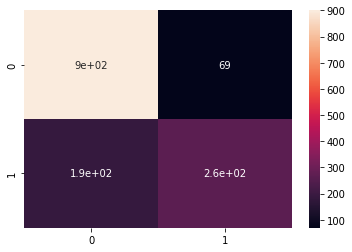

In [216]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

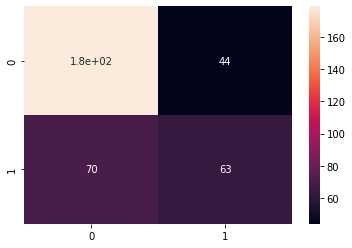

In [217]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [218]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       223
           1       0.59      0.47      0.53       133

    accuracy                           0.68       356
   macro avg       0.65      0.64      0.64       356
weighted avg       0.67      0.68      0.67       356












## Cross Validation

In [219]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = NB_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 69.06 %
Standard Deviation: 2.05 %




## Logistic Regression

In [220]:
#importing the logistic regression class from scikit learn library
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression() #create LR Classifier
LR_classifier.fit(X_train, y_train) #applying fit function to connect the training set

LogisticRegression()

STEP#5: EVALUATING THE MODEL

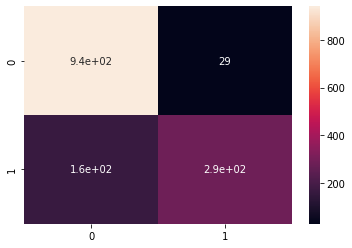

In [221]:
#importing classification report & confusion_matrix from scikit learn library
from sklearn.metrics import classification_report, confusion_matrix


#train the dataset with LR classifier
y_predict_train = LR_classifier.predict(X_train)
y_predict_train

#Generate confusion matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True) #generate heatmap

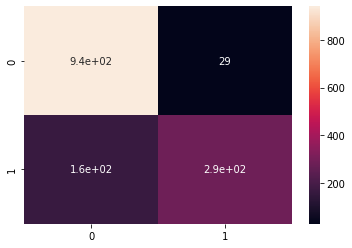

In [222]:
#train the dataset with LR classifier
y_predict_train = LR_classifier.predict(X_train)
y_predict_train

#Generate confusion matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True) #generate heatmap

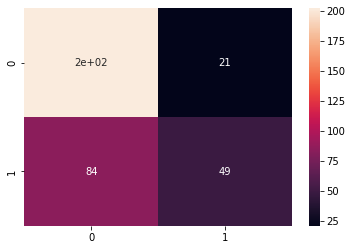

In [223]:
# Predicting the Test set results
y_predict_test = LR_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [224]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.71      0.91      0.79       223
           1       0.70      0.37      0.48       133

    accuracy                           0.71       356
   macro avg       0.70      0.64      0.64       356
weighted avg       0.70      0.71      0.68       356



## Cross Validation

In [225]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 71.73 %
Standard Deviation: 2.90 %


## SVM

In [226]:
from sklearn.svm import SVC

SVM_classifier = SVC(kernel = 'linear', random_state = 0)
SVM_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

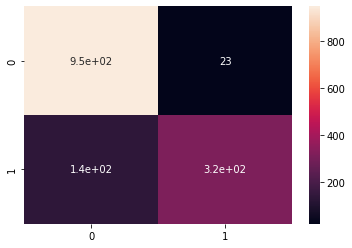

In [227]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


y_predict_train = SVM_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

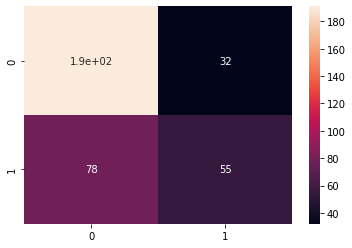

In [228]:
# Predicting the Test set results
y_predict_test =SVM_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm, annot=True)

In [229]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       223
           1       0.63      0.41      0.50       133

    accuracy                           0.69       356
   macro avg       0.67      0.64      0.64       356
weighted avg       0.68      0.69      0.67       356



## Cross Validation

In [230]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = SVM_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 69.48 %
Standard Deviation: 2.35 %


## RANDOM FOREST

In [231]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

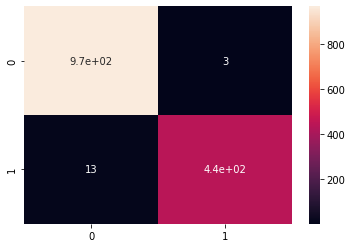

In [232]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = RF_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

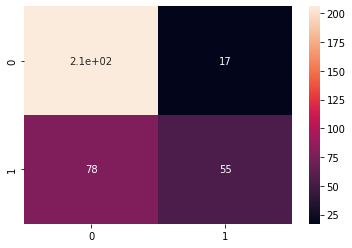

In [233]:
# Predicting the Test set results
y_predict_test = RF_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [234]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81       223
           1       0.76      0.41      0.54       133

    accuracy                           0.73       356
   macro avg       0.74      0.67      0.67       356
weighted avg       0.74      0.73      0.71       356



## Cross Validation

In [235]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 72.78 %
Standard Deviation: 3.14 %


##GBDT

In [236]:
from sklearn.ensemble import GradientBoostingClassifier

GBDT_classifier = GradientBoostingClassifier()
GBDT_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

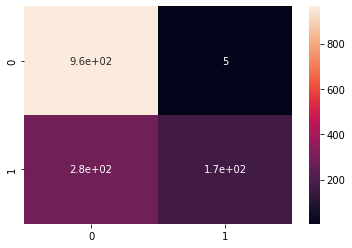

In [237]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = GBDT_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

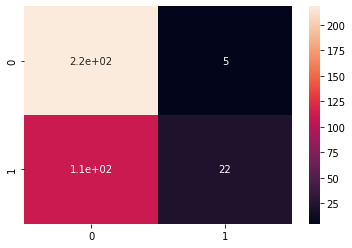

In [238]:
# Predicting the Test set results
y_predict_test = GBDT_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [239]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.66      0.98      0.79       223
           1       0.81      0.17      0.28       133

    accuracy                           0.67       356
   macro avg       0.74      0.57      0.53       356
weighted avg       0.72      0.67      0.60       356



## Cross Validation

In [240]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = GBDT_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 71.94 %
Standard Deviation: 1.69 %


## XGBoost

In [241]:
from xgboost import XGBClassifier
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train)

XGBClassifier()

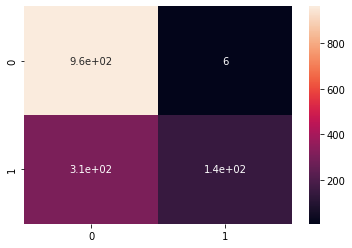

In [242]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_predict_train = XGB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

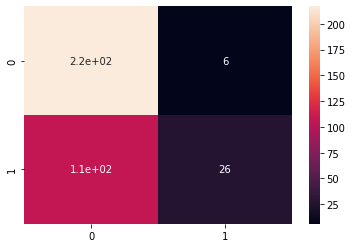

In [243]:
# Predicting the Test set results
y_predict_test = XGB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [244]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.67      0.97      0.79       223
           1       0.81      0.20      0.32       133

    accuracy                           0.68       356
   macro avg       0.74      0.58      0.55       356
weighted avg       0.72      0.68      0.61       356



## Cross Validation

In [245]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = XGB_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 72.57 %
Standard Deviation: 2.23 %


## ROC Curve

In [246]:
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
XGB_classifier = XGBClassifier()
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()


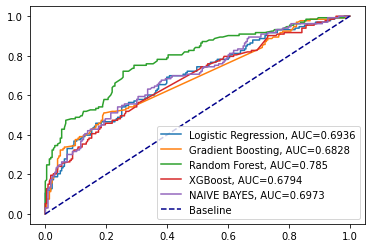

In [247]:
#set up plotting area
plt.figure(0).clf()


#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="NAIVE BAYES, AUC="+str(auc))

# Plot line with no predictive power (baseline)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Baseline')

#add legend
plt.legend()

# STEP #5:  Tf-IdfVectorizer

In [343]:
depressed_countvectorizer

<1778x1548 sparse matrix of type '<class 'numpy.int64'>'
	with 17540 stored elements in Compressed Sparse Row format>

In [420]:
from sklearn.feature_extraction.text import TfidfTransformer

depressed_tfidf = TfidfTransformer().fit_transform(depressed_countvectorizer)


In [345]:
print(depressed_tfidf[:,:])
# Sparse matrix with all the values of IF-IDF

  (0, 1118)	0.5050542582735771
  (0, 712)	0.5896620230130787
  (0, 148)	0.5175329562053415
  (0, 132)	0.3596922768940286
  (1, 1111)	0.19984753218132467
  (1, 984)	0.20290214146472244
  (1, 906)	0.14185530852853329
  (1, 807)	0.36308122781839164
  (1, 788)	0.2674136789399007
  (1, 719)	0.24229975713125843
  (1, 708)	0.21418880037234975
  (1, 522)	0.20615918616049614
  (1, 462)	0.10043393990368528
  (1, 322)	0.2807828635501822
  (1, 309)	0.39958854039437525
  (1, 297)	0.16882467298119597
  (1, 148)	0.19641613558281187
  (1, 139)	0.1678881990518675
  (1, 112)	0.3563357233135206
  (1, 20)	0.278394360768348
  (2, 1425)	0.27803342776542167
  (2, 968)	0.3615164581206943
  (2, 840)	0.3754782976536643
  (2, 462)	0.13847241972680407
  (2, 419)	0.24887578790651785
  :	:
  (1777, 229)	0.04817761983580577
  (1777, 222)	0.04451432192220745
  (1777, 213)	0.05358014114066619
  (1777, 209)	0.034476540012004966
  (1777, 206)	0.04613270272704019
  (1777, 201)	0.04613270272704019
  (1777, 139)	0.02661640

In [346]:
X = depressed_tfidf
y = Label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



## Naive_Bayes

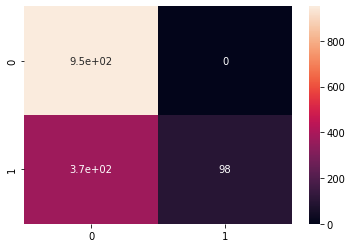

In [252]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

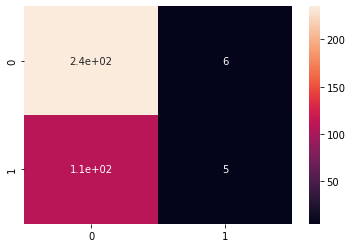

In [253]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [254]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.68      0.98      0.80       241
           1       0.45      0.04      0.08       115

    accuracy                           0.67       356
   macro avg       0.57      0.51      0.44       356
weighted avg       0.61      0.67      0.57       356



## Cross Validation

In [255]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = NB_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 68.35 %
Standard Deviation: 0.79 %


## Logistic Regression

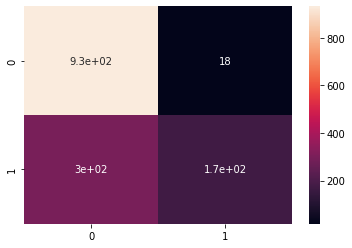

In [256]:
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix


y_predict_train = LR_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

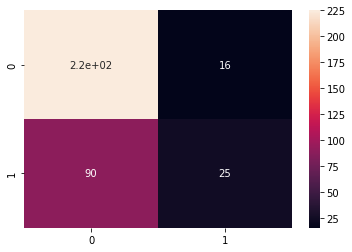

In [257]:
# Predicting the Test set results
y_predict_test = LR_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [258]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81       241
           1       0.61      0.22      0.32       115

    accuracy                           0.70       356
   macro avg       0.66      0.58      0.56       356
weighted avg       0.68      0.70      0.65       356



## Cross Validation

In [259]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 69.69 %
Standard Deviation: 0.64 %


## SVM

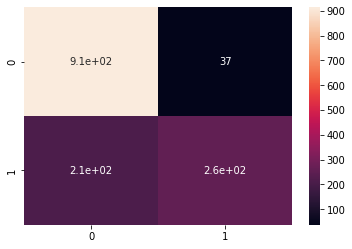

In [260]:
from sklearn.svm import SVC

SVM_classifier = SVC(kernel = 'linear', random_state = 0)
SVM_classifier.fit(X_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


y_predict_train = SVM_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

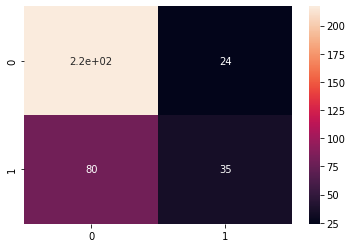

In [261]:
# Predicting the Test set results
y_predict_test =SVM_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm, annot=True)

In [262]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81       241
           1       0.59      0.30      0.40       115

    accuracy                           0.71       356
   macro avg       0.66      0.60      0.60       356
weighted avg       0.69      0.71      0.68       356



## Cross Validation

In [263]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = SVM_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 70.60 %
Standard Deviation: 0.84 %


## RANDOM FOREST

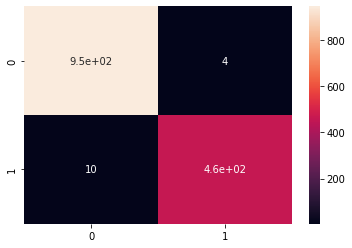

In [264]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix


y_predict_train = RF_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

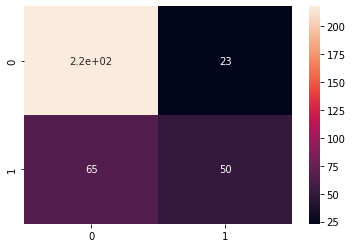

In [265]:


# Predicting the Test set results
y_predict_test = RF_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [266]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       241
           1       0.68      0.43      0.53       115

    accuracy                           0.75       356
   macro avg       0.73      0.67      0.68       356
weighted avg       0.74      0.75      0.74       356



## Cross Validation 

In [267]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.98 %
Standard Deviation: 2.03 %


## GBDT

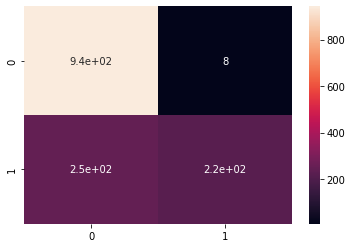

In [268]:
from sklearn.ensemble import GradientBoostingClassifier

GBDT_classifier = GradientBoostingClassifier()
GBDT_classifier.fit(X_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix


y_predict_train = GBDT_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

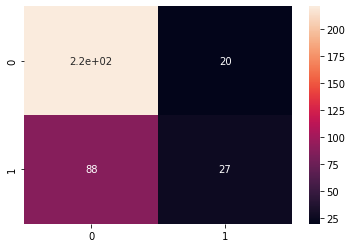

In [269]:
# Predicting the Test set results
y_predict_test = GBDT_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [270]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.72      0.92      0.80       241
           1       0.57      0.23      0.33       115

    accuracy                           0.70       356
   macro avg       0.64      0.58      0.57       356
weighted avg       0.67      0.70      0.65       356



## Cross Validation

In [271]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = GBDT_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 70.74 %
Standard Deviation: 2.11 %


## XGBoost

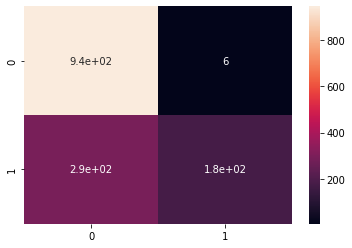

In [272]:
from xgboost import XGBClassifier
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


y_predict_train = XGB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

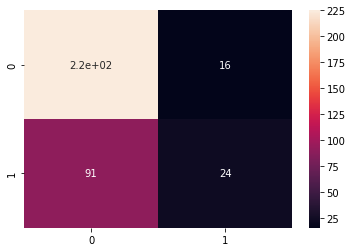

In [273]:
# Predicting the Test set results
y_predict_test = XGB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [274]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81       241
           1       0.60      0.21      0.31       115

    accuracy                           0.70       356
   macro avg       0.66      0.57      0.56       356
weighted avg       0.68      0.70      0.65       356



## Cross Validation

In [275]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = XGB_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 70.68 %
Standard Deviation: 1.79 %


## ROC Curve

In [276]:
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
XGB_classifier = XGBClassifier()
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()

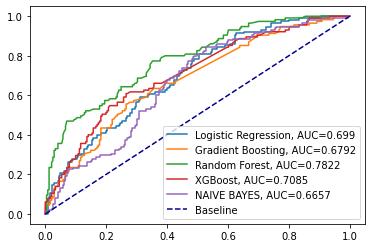

In [277]:
#set up plotting area
plt.figure(0).clf()


#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="NAIVE BAYES, AUC="+str(auc))

# Plot line with no predictive power (baseline)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Baseline')

#add legend
plt.legend()

#LIWC+ Tf-Idf

In [427]:
!pip install liwc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [431]:
import liwc

liwcPath = ('LIWC2007_English080730.dic')
parse, category_names = liwc.load_token_parser(liwcPath)

In [443]:
corpus = []
words = []

for i in range(0,len(data)):
    review = re.sub('[^a-zA-Z0-9]',' ',data['translated_Text'][i])
    review = review.lower()
    review = review.split() 
    review = list(category for token in review for category in parse(token))
    statements = ' '.join(review)
    corpus.append(statements)
    words.append(review)

In [444]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=5000)
X_fit=vectorizer.fit(corpus)

In [445]:
depressed_countvectorizer =X_fit.transform(corpus)

In [446]:
features = vectorizer.get_feature_names()
df_count = pd.DataFrame(X_transformed.toarray(),columns = features)
df_count

,achieve,adverb,affect,anger,anx,article,assent,auxverb,bio,body,...,social,space,swear,tentat,they,time,verb,we,work,you
0,0.000000,0.111579,0.090714,0.000000,0.0,0.000000,0.0,0.085035,0.000000,0.000000,...,0.000000,0.105202,0.0,0.000000,0.000000,0.107643,0.301086,0.000000,0.000000,0.000000
1,0.000000,0.253836,0.103185,0.000000,0.0,0.112136,0.0,0.145089,0.000000,0.000000,...,0.145923,0.119665,0.0,0.074555,0.000000,0.061221,0.214049,0.000000,0.000000,0.163548
2,0.000000,0.000000,0.266439,0.225425,0.0,0.096517,0.0,0.166507,0.000000,0.000000,...,0.167464,0.000000,0.0,0.128341,0.000000,0.210775,0.147388,0.000000,0.000000,0.000000
3,0.366269,0.000000,0.070327,0.000000,0.0,0.000000,0.0,0.263700,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.291777,0.000000,0.152543,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.191105,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,0.000000,0.000000,0.295580,0.000000,0.0,0.000000,0.0,0.092359,0.268189,0.207268,...,0.278669,0.000000,0.0,0.142378,0.000000,0.233827,0.163508,0.000000,0.000000,0.000000
1774,0.000000,0.193500,0.157317,0.000000,0.0,0.085481,0.0,0.073734,0.000000,0.000000,...,0.222475,0.000000,0.0,0.113667,0.000000,0.280013,0.065268,0.214622,0.000000,0.124673
1775,0.000000,0.087213,0.070905,0.000000,0.0,0.038528,0.0,0.033233,0.096502,0.000000,...,0.066849,0.246687,0.0,0.153695,0.000000,0.126206,0.058835,0.000000,0.000000,0.000000
1776,0.054955,0.050062,0.049745,0.011478,0.0,0.098291,0.0,0.076305,0.067703,0.076107,...,0.191860,0.094401,0.0,0.071885,0.023938,0.042930,0.172612,0.074035,0.019618,0.043007


# STEP #4: COUNT VECTORIZER

### APPLY COUNT VECTORIZER

## TRAINING THE MODEL WITH ALL DATASET

## Naive_Bayes

In [447]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
Label = data['Label'].values
NB_classifier.fit(depressed_countvectorizer, Label)

MultinomialNB()

STEP#4: DIVIDE THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING

In [448]:
X = depressed_countvectorizer
y = Label

In [449]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [450]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

STEP#5: EVALUATING THE MODEL

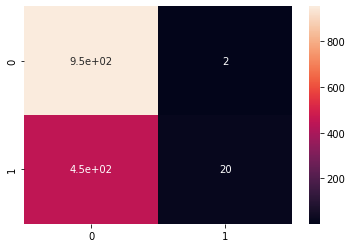

In [451]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

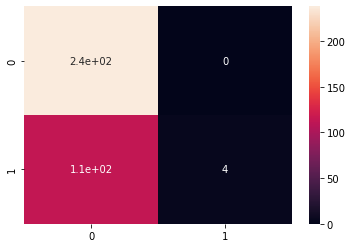

In [452]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [453]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       238
           1       1.00      0.03      0.07       118

    accuracy                           0.68       356
   macro avg       0.84      0.52      0.44       356
weighted avg       0.78      0.68      0.56       356












## Cross Validation

In [454]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = NB_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 68.28 %
Standard Deviation: 0.31 %




## Logistic Regression

In [455]:
#importing the logistic regression class from scikit learn library
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression() #create LR Classifier
LR_classifier.fit(X_train, y_train) #applying fit function to connect the training set

LogisticRegression()

STEP#5: EVALUATING THE MODEL

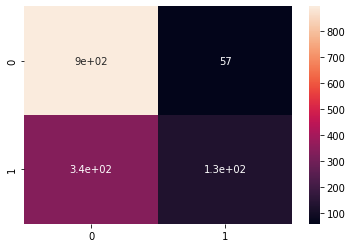

In [456]:
#importing classification report & confusion_matrix from scikit learn library
from sklearn.metrics import classification_report, confusion_matrix


#train the dataset with LR classifier
y_predict_train = LR_classifier.predict(X_train)
y_predict_train

#Generate confusion matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True) #generate heatmap

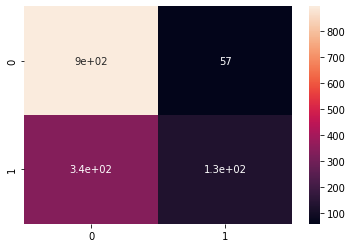

In [457]:
#train the dataset with LR classifier
y_predict_train = LR_classifier.predict(X_train)
y_predict_train

#Generate confusion matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True) #generate heatmap

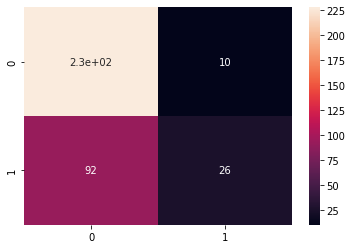

In [458]:
# Predicting the Test set results
y_predict_test = LR_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [459]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.71      0.96      0.82       238
           1       0.72      0.22      0.34       118

    accuracy                           0.71       356
   macro avg       0.72      0.59      0.58       356
weighted avg       0.72      0.71      0.66       356



## Cross Validation

In [460]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 71.03 %
Standard Deviation: 1.72 %


## SVM

In [461]:
from sklearn.svm import SVC

SVM_classifier = SVC(kernel = 'linear', random_state = 0)
SVM_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

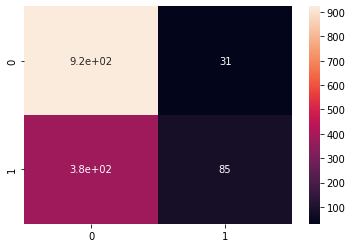

In [462]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


y_predict_train = SVM_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

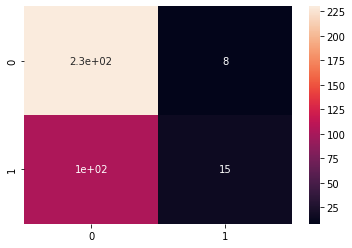

In [463]:
# Predicting the Test set results
y_predict_test =SVM_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm, annot=True)

In [464]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.69      0.97      0.81       238
           1       0.65      0.13      0.21       118

    accuracy                           0.69       356
   macro avg       0.67      0.55      0.51       356
weighted avg       0.68      0.69      0.61       356



## Cross Validation

In [465]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = SVM_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 69.27 %
Standard Deviation: 1.02 %


## RANDOM FOREST

In [466]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

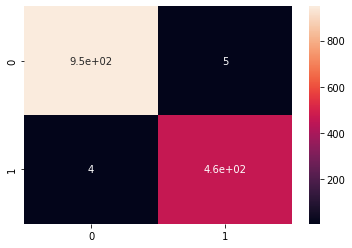

In [467]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = RF_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

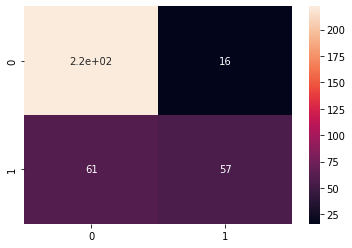

In [468]:
# Predicting the Test set results
y_predict_test = RF_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [469]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       238
           1       0.78      0.48      0.60       118

    accuracy                           0.78       356
   macro avg       0.78      0.71      0.72       356
weighted avg       0.78      0.78      0.77       356



## Cross Validation

In [470]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.54 %
Standard Deviation: 2.08 %


##GBDT

In [471]:
from sklearn.ensemble import GradientBoostingClassifier

GBDT_classifier = GradientBoostingClassifier()
GBDT_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

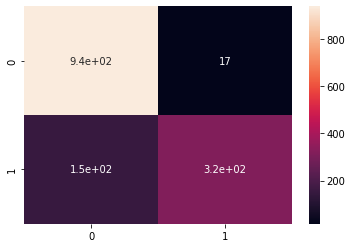

In [472]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = GBDT_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

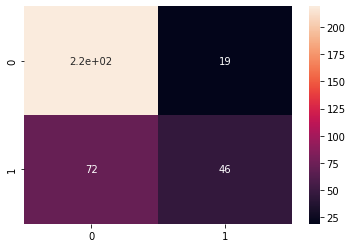

In [473]:
# Predicting the Test set results
y_predict_test = GBDT_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [474]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       238
           1       0.71      0.39      0.50       118

    accuracy                           0.74       356
   macro avg       0.73      0.65      0.67       356
weighted avg       0.74      0.74      0.72       356



## Cross Validation

In [475]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = GBDT_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.91 %
Standard Deviation: 1.95 %


## XGBoost

In [476]:
from xgboost import XGBClassifier
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train)

XGBClassifier()

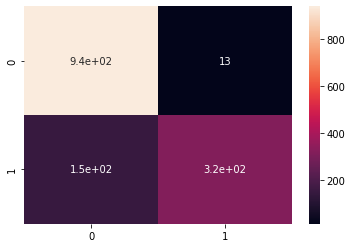

In [477]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_predict_train = XGB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

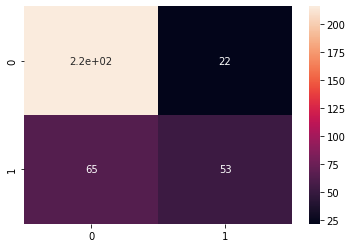

In [478]:
# Predicting the Test set results
y_predict_test = XGB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [479]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       238
           1       0.71      0.45      0.55       118

    accuracy                           0.76       356
   macro avg       0.74      0.68      0.69       356
weighted avg       0.75      0.76      0.74       356



## Cross Validation

In [480]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = XGB_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 72.51 %
Standard Deviation: 1.96 %


## ROC Curve

In [481]:
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
XGB_classifier = XGBClassifier()
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()


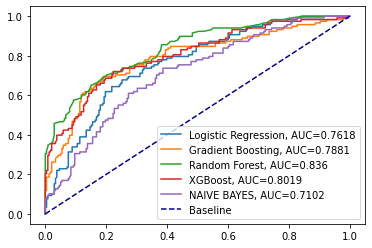

In [482]:
#set up plotting area
plt.figure(0).clf()


#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="NAIVE BAYES, AUC="+str(auc))

# Plot line with no predictive power (baseline)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Baseline')

#add legend
plt.legend()